In [1]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Replace sample_func_dir by the name of directory in src/ and replace sample_func_file the
# file name in src/sample_func_dir

In [2]:
# import the function
from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import *

import matplotlib.pyplot as plt

from rdtools.soiling import soiling_srr

# Soiling function of rdTools

In [3]:
# path to the zip-archive
path_to_zip_pkl = '../data/raw/synthetic_soil.zip' 

In [4]:
df = import_df_from_zip_pkl(path_to_zip_pkl, index=15, verbose=True)

time for importing dataframe: 0.72 seconds


In [5]:
df_down = downsample_dataframe(df)

In [6]:
df_down.head()

,Power,POA,Tamb,Wind,Degradation,Soiling,Faults,minute_of_day
datetime,,,,,,,,
2015-01-01 00:00:00-05:00,306.363889,122.879861,6.325347,0.0,0.999984,0.998523,1.0,719.5
2015-01-02 00:00:00-05:00,307.875000,123.457639,6.283333,0.0,0.999952,0.998351,1.0,719.5
2015-01-03 00:00:00-05:00,309.203472,124.077083,6.237153,0.0,0.999920,0.997251,1.0,719.5
2015-01-04 00:00:00-05:00,310.650694,124.736111,6.194306,0.0,0.999888,0.996151,1.0,719.5
2015-01-05 00:00:00-05:00,312.223611,125.452778,6.150417,0.0,0.999856,0.995051,1.0,719.5


Use the rdTools function with all the default parameters with the power signal normalised by the POA we have.

In [7]:
%%time
soiling_profile = soiling_srr(df_down.Power/df_down.POA, df_down.POA)

CPU times: user 45.5 s, sys: 31.5 ms, total: 45.6 s
Wall time: 45.5 s


/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


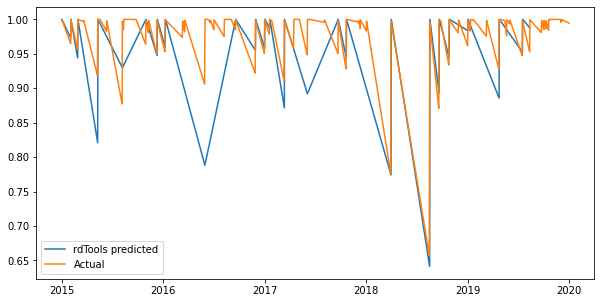

In [8]:
_, ax = plt.subplots(figsize=(10, 5))

ax.plot(soiling_profile[2]['soiling_ratio_perfect_clean'], label="rdTools predicted")
ax.plot(df.Soiling, label="Actual")
ax.legend()